# Time Series Forecasting of Stock Market DATA with Arima and  SARIMA Models

## Stock Market Data scraping in python 

In [19]:
# importing libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime as dt 
from datetime import date, timedelta
import yfinance as yf
import plotly.express as px 
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX



In [20]:
today = date.today()
d1 = today.strftime('%Y-%m-%d') 
d2 = date.today()-timedelta(days=365)
d2 = d2.strftime( '%Y-%m-%d' )
start_date = d2
end_date = d1
print('Your data will be between these dates:' ,start_date, end_date)

Your data will be between these dates: 2023-03-27 2024-03-26


In [21]:
# defining the tikcer 
ticker = 'GOOGL'

df = yf.download(ticker,start=start_date,end=end_date,progress=False)

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-27,104.620003,104.760002,101.930000,102.459999,102.459999,31120900
2023-03-28,102.440002,102.449997,99.739998,101.029999,101.029999,32057900
2023-03-29,102.279999,102.489998,100.650002,101.389999,101.389999,28779600
2023-03-30,100.910004,101.160004,99.779999,100.889999,100.889999,33086200
2023-03-31,101.300003,103.889999,101.040001,103.730003,103.730003,36863400


In [22]:
# making date index as a column
df.insert(0,'Date',df.index,True)
df.reset_index(drop=True,inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-27,104.620003,104.760002,101.930000,102.459999,102.459999,31120900
1,2023-03-28,102.440002,102.449997,99.739998,101.029999,101.029999,32057900
2,2023-03-29,102.279999,102.489998,100.650002,101.389999,101.389999,28779600
3,2023-03-30,100.910004,101.160004,99.779999,100.889999,100.889999,33086200
4,2023-03-31,101.300003,103.889999,101.040001,103.730003,103.730003,36863400


In [23]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,251,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,2023-09-24 02:40:38.247011840,129.459044,130.895538,128.253984,129.617212,129.617212,3.063726e+07
min,2023-03-27 00:00:00,100.910004,101.160004,99.739998,100.889999,100.889999,1.251430e+07
25%,2023-06-26 12:00:00,122.805000,124.074997,121.555000,122.660000,122.660000,2.356725e+07
50%,2023-09-25 00:00:00,131.619995,133.000000,130.139999,131.839996,131.839996,2.719190e+07
75%,2023-12-21 12:00:00,138.000000,139.205002,136.614998,138.080002,138.080002,3.498100e+07
max,2024-03-25 00:00:00,152.800003,153.779999,151.429993,153.509995,153.509995,8.436620e+07
std,NaN,12.259420,12.249018,12.239864,12.234072,12.234072,1.113175e+07


In [24]:
# let's plot whole dataset using ploty 

fig = px.line(df, x='Date',y=df.columns,title='Google Stock Price')
fig.show()

In [25]:
df = df[['Date','Close']]
# let's plot the data 
df.head()

,Date,Close
0,2023-03-27,102.459999
1,2023-03-28,101.029999
2,2023-03-29,101.389999
3,2023-03-30,100.889999
4,2023-03-31,103.730003


In [26]:
# let's plot this data 
fig = px.line(df,x='Date',y='Close',title='Google Stock Price')
fig.show()

In [27]:
df.describe()

,Date,Close
count,251,251.000000
mean,2023-09-24 02:40:38.247011840,129.617212
min,2023-03-27 00:00:00,100.889999
25%,2023-06-26 12:00:00,122.660000
50%,2023-09-25 00:00:00,131.839996
75%,2023-12-21 12:00:00,138.080002
max,2024-03-25 00:00:00,153.509995
std,NaN,12.234072


In [28]:
# stationarity check on the data 
from statsmodels.tsa.stattools import adfuller
def stationarity_check(df):
    result = adfuller(df)   
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] >= 0.05:
        print('Reject null hypothesis: Data is stationary')
    else:
        print('Fail to Reject the null hypothesis.Data is stationary')

stationarity_check(df['Close'])

ADF Statistic: -1.838512
p-value: 0.361516
Reject null hypothesis: Data is stationary


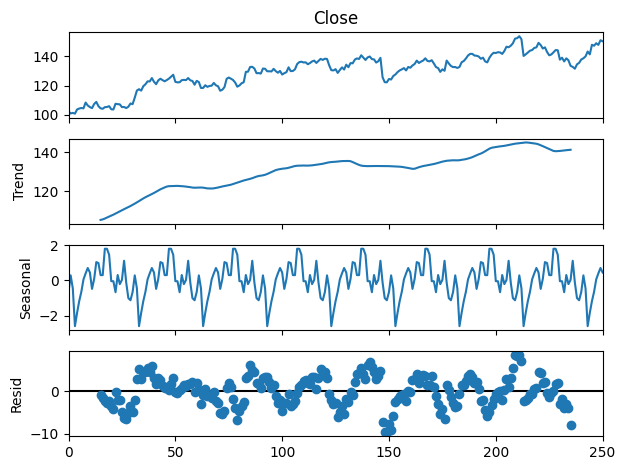

In [30]:
decompose = seasonal_decompose(df['Close'],model='additive',period=30)
decompose.plot()
plt.show()

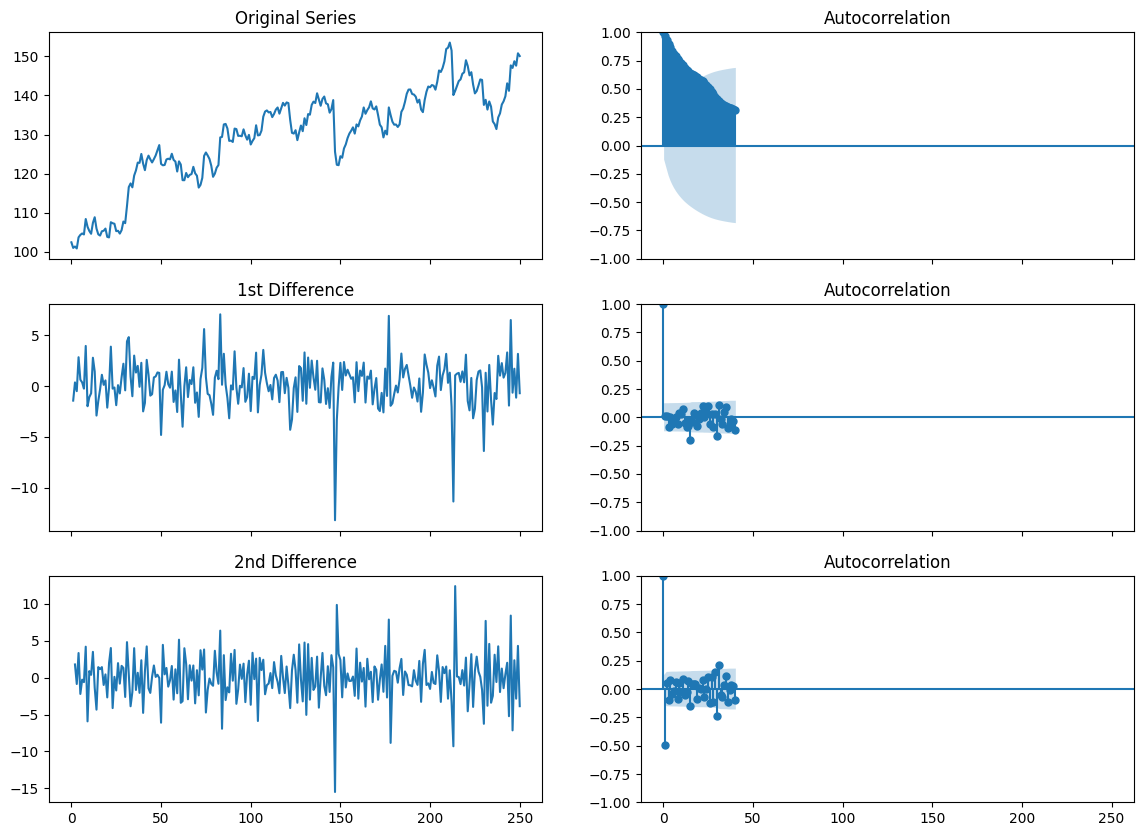

In [32]:
# import autocorrelation from statsmodels
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original series
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
axes[0, 0].plot(df['Close'])
axes[0, 0].set_title('Original Series')
acf_plot = plot_acf(df['Close'], ax=axes[0, 1], lags=40)

# 1st Differencing
diff1 = df['Close'].diff().dropna()
axes[1, 0].plot(diff1)
axes[1, 0].set_title('1st Difference')
acf_plot_diff1 = plot_acf(diff1, ax=axes[1, 1], lags=40)

# 2nd Differencing
diff2 = df['Close'].diff().diff().dropna()
axes[2, 0].plot(diff2)
axes[2, 0].set_title('2nd Difference')
acf_plot_diff2 = plot_acf(diff2, ax=axes[2, 1], lags=40)

plt.show()




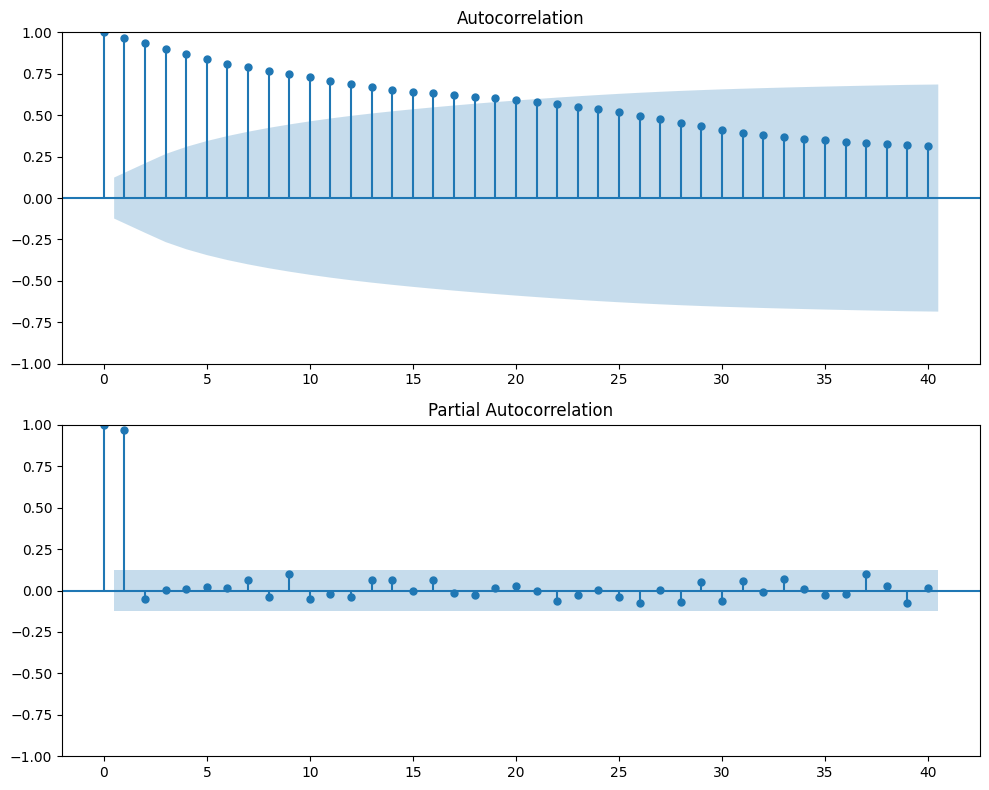

In [33]:
# import autocorrelation from statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original series
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df['Close'], ax=axes[0], lags=40, title='Autocorrelation')
plot_pacf(df['Close'], ax=axes[1], lags=40, title='Partial Autocorrelation')

plt.tight_layout()
plt.show()
